### **Modelo Simples para Prever `Séries Temporais` utilizando _Regressão Linear_**
---

- https://www.mariofilho.com/como-criar-um-modelo-simples-para-prever-series-temporais-usando-machine-learning-em-python/

In [60]:
# importando as funções
from platform import python_version, system, release

print(f'Versão do Python: {python_version()}')
print(F'SO: {system()} {release()}')

Versão do Python: 3.9.10
SO: Windows 10


In [61]:
# importando as bibliotecas
import pandas as pd     # análise e manipulação de dados
import numpy as np      # aplicações matemáticas

In [16]:
# função para calcular o MAPE
def mape(y_pred, y_true):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [62]:
# instanciando no objeto "file_path" a url do arquivo
file_path = 'https://raw.githubusercontent.com/ledmaster/TimeSeriesForecasting/master/prime.csv'

In [63]:
# carregando os dados
data = pd.read_csv(file_path, header=0, index_col=0).sort_index()

# visualizando as 5 primeiras observções
data.head()

,Value
Date,
2005-01-31,19.11
2005-02-28,19.40
2005-03-31,19.79
2005-04-30,20.68
2005-05-31,21.35


In [64]:
# instanciando duas listas para armazenar os dados da variável explicativa (X) e da variável resposta (y)
X_data, y_data = [], []

# realizando um laço de repetição onde cada linha da matriz X seja composta pelos 6 meses anteriores
for d in range(6, data.shape[0]):

    X = data.iloc[d-6:d].values.ravel()
    y = data.iloc[d].values[0]

    X_data.append(X)
    y_data.append(y)

# visualizando as 5 primeiras observações de cada objeto
print(
    X_data[:5],
    y_data[:5],
    sep='\n\n'
)

[array([19.11, 19.4 , 19.79, 20.68, 21.35, 21.64]), array([19.4 , 19.79, 20.68, 21.35, 21.64, 21.35]), array([19.79, 20.68, 21.35, 21.64, 21.35, 21.16]), array([20.68, 21.35, 21.64, 21.35, 21.16, 21.07]), array([21.35, 21.64, 21.35, 21.16, 21.07, 21.07])]

[21.35, 21.16, 21.07, 21.07, 21.2]


In [65]:
# visualizando o tipo de objeto
print(type(X_data))
print(type(y_data))

<class 'list'>
<class 'list'>


In [66]:
# transformando o tipo dos objetos de "list" para "numpy.array"
X_data = np.array(X_data)
y_data = np.array(y_data)

In [67]:
# visualizando o tipo de objeto depois da transformação
print(type(X_data))
print(type(y_data))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [68]:
# visualizando as 5 primeiras observações de cada objeto após a transformação do tipo
print(
    X_data[:5],
    y_data[:5],
    sep='\n\n'
)

[[19.11 19.4  19.79 20.68 21.35 21.64]
 [19.4  19.79 20.68 21.35 21.64 21.35]
 [19.79 20.68 21.35 21.64 21.35 21.16]
 [20.68 21.35 21.64 21.35 21.16 21.07]
 [21.35 21.64 21.35 21.16 21.07 21.07]]

[21.35 21.16 21.07 21.07 21.2 ]


In [69]:
# importando as funções para construção do modelo
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [28]:
# listas para armazenar as previsões de cada modelo
y_pred, y_pred_last, y_pred_ma, y_true = [], [], [], []
end = y_data.shape[0] 

# realizando um laço de repetição 
for i in range(30, end):

    # dados de treino
    X_train = X_data[:i, :]
    y_train = y_data[:i]

    # dados de teste
    X_test = X_data[i, :]
    y_test = y_data[i]

    # instanciando o modelo
    #model = LinearRegression()
    model = make_pipeline(StandardScaler(with_mean=True), LinearRegression(n_jobs=-1))

    # treinando o modelo
    model.fit(X_train, y_train)

    # realizando as predições com o modelo após seu treinamento e salvando os resultados na lista
    y_pred.append(model.predict([X_test]))
    y_pred_last.append(X_test[-1])
    y_pred_ma.append(X_test.mean())
    y_true.append(y_test)

In [29]:
# transformando as listas em arrays numpy para facilitar os cálculos
y_pred = np.array(y_pred)
y_pred_last = np.array(y_pred_last)
y_pred_ma = np.array(y_pred_ma)
y_true = np.array(y_true)

In [72]:
# visualizando as 10 primeiras predições e a classe do objeto
print(
    y_pred[:10],
    type(y_pred),
    sep='\n\n'
)

[[14.22736119]
 [14.29696094]
 [14.29719367]
 [13.70288403]
 [15.19079818]
 [15.79500856]
 [16.46186027]
 [16.65730177]
 [16.92879338]
 [18.25113656]]

<class 'numpy.ndarray'>


In [73]:
# importando a função para cálculo do erro médio absoluto
from sklearn.metrics import mean_absolute_error

In [74]:
# imprimindo os resultados
print('\nMean Absolute Percentage Error - MAPE')
print('Regressão Linear', mape(y_pred, y_true))
print('Último Valor', mape(y_pred_last, y_true))
print('Média Móvel', mape(y_pred_ma, y_true))


print('\nMean Absolute Error - MAE')
print('Regressão Linear', mean_absolute_error(y_pred, y_true))
print('Último Valor', mean_absolute_error(y_pred_last, y_true))
print('Média Móvel', mean_absolute_error(y_pred_ma, y_true))


Mean Absolute Percentage Error - MAPE
Regressão Linear 17.652676714326322
Último Valor 2.7677439037812333
Média Móvel 7.903860891718388

Mean Absolute Error - MAE
Regressão Linear 0.2840871878813467
Último Valor 0.427831325301205
Média Móvel 1.1985140562248995


In [83]:
# fazendo o teste com "Wilcoxon Signed-Rank" para determinar significado estatístico da diferença nos erros
# OPCIONAL - REQUER SCIPY
from scipy.stats import wilcoxon

error_linreg = abs(y_true - y_pred)
error_last = abs(y_true - y_pred_last)

In [93]:
error_linreg, error_linreg.mean()


(array([[0.12263881, 0.01263881, 0.12736119, ..., 1.07263881, 1.27263881,
         1.37263881],
        [0.05303906, 0.05696094, 0.19696094, ..., 1.00303906, 1.20303906,
         1.30303906],
        [0.05280633, 0.05719367, 0.19719367, ..., 1.00280633, 1.20280633,
         1.30280633],
        ...,
        [0.9903742 , 1.1003742 , 1.2403742 , ..., 0.0403742 , 0.1596258 ,
         0.2596258 ],
        [0.9928321 , 1.1028321 , 1.2428321 , ..., 0.0428321 , 0.1571679 ,
         0.2571679 ],
        [1.26661873, 1.37661873, 1.51661873, ..., 0.31661873, 0.11661873,
         0.01661873]]),
 2.586659534520164)

In [94]:
error_last, error_last.mean()

(array([0.56, 0.11, 0.14, 0.58, 0.61, 0.92, 0.21, 0.36, 0.68, 1.79, 1.5 ,
        1.03, 0.26, 1.01, 1.48, 1.96, 0.79, 1.01, 0.54, 0.52, 0.32, 0.44,
        0.02, 0.38, 0.19, 0.37, 0.15, 0.26, 0.26, 0.48, 1.1 , 0.76, 0.15,
        0.82, 0.23, 0.05, 0.63, 0.37, 0.27, 0.  , 0.1 , 0.2 , 0.4 , 0.  ,
        0.4 , 0.6 , 0.3 , 0.6 , 0.2 , 0.1 , 0.2 , 0.5 , 1.3 , 0.9 , 0.5 ,
        0.  , 0.1 , 0.5 , 0.1 , 0.2 , 0.  , 0.2 , 0.1 , 0.1 , 0.2 , 0.6 ,
        0.7 , 0.7 , 0.5 , 0.2 , 0.2 , 0.2 , 0.3 , 0.1 , 0.3 , 0.1 , 0.  ,
        0.1 , 0.  , 0.1 , 0.  , 0.2 , 0.1 ]),
 0.427831325301205)

In [117]:
(error_linreg.mean() + error_last.mean()) / 2

1.5072454299106846

In [121]:
(wilcoxon(error_linreg).pvalue[0], error_last)[0] / 2.0

1.2517216434019519e-15

In [122]:
(wilcoxon(error_linreg).pvalue[0], error_last)[1] / 2.0

array([0.28 , 0.055, 0.07 , 0.29 , 0.305, 0.46 , 0.105, 0.18 , 0.34 ,
       0.895, 0.75 , 0.515, 0.13 , 0.505, 0.74 , 0.98 , 0.395, 0.505,
       0.27 , 0.26 , 0.16 , 0.22 , 0.01 , 0.19 , 0.095, 0.185, 0.075,
       0.13 , 0.13 , 0.24 , 0.55 , 0.38 , 0.075, 0.41 , 0.115, 0.025,
       0.315, 0.185, 0.135, 0.   , 0.05 , 0.1  , 0.2  , 0.   , 0.2  ,
       0.3  , 0.15 , 0.3  , 0.1  , 0.05 , 0.1  , 0.25 , 0.65 , 0.45 ,
       0.25 , 0.   , 0.05 , 0.25 , 0.05 , 0.1  , 0.   , 0.1  , 0.05 ,
       0.05 , 0.1  , 0.3  , 0.35 , 0.35 , 0.25 , 0.1  , 0.1  , 0.1  ,
       0.15 , 0.05 , 0.15 , 0.05 , 0.   , 0.05 , 0.   , 0.05 , 0.   ,
       0.1  , 0.05 ])

In [127]:
wilcoxon(error_linreg[1], error_last)[1] / 2.0

2.9421518002774616e-13

In [128]:
#pip install pingouin

In [129]:
import pingouin as pg

In [132]:
pg.wilcoxon(error_linreg[1], error_last)

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,156.5,two-sided,5.983119e-13,0.910212,0.840615


In [133]:
error_linreg

array([[0.12263881, 0.01263881, 0.12736119, ..., 1.07263881, 1.27263881,
        1.37263881],
       [0.05303906, 0.05696094, 0.19696094, ..., 1.00303906, 1.20303906,
        1.30303906],
       [0.05280633, 0.05719367, 0.19719367, ..., 1.00280633, 1.20280633,
        1.30280633],
       ...,
       [0.9903742 , 1.1003742 , 1.2403742 , ..., 0.0403742 , 0.1596258 ,
        0.2596258 ],
       [0.9928321 , 1.1028321 , 1.2428321 , ..., 0.0428321 , 0.1571679 ,
        0.2571679 ],
       [1.26661873, 1.37661873, 1.51661873, ..., 0.31661873, 0.11661873,
        0.01661873]])

In [134]:
error_last

array([0.56, 0.11, 0.14, 0.58, 0.61, 0.92, 0.21, 0.36, 0.68, 1.79, 1.5 ,
       1.03, 0.26, 1.01, 1.48, 1.96, 0.79, 1.01, 0.54, 0.52, 0.32, 0.44,
       0.02, 0.38, 0.19, 0.37, 0.15, 0.26, 0.26, 0.48, 1.1 , 0.76, 0.15,
       0.82, 0.23, 0.05, 0.63, 0.37, 0.27, 0.  , 0.1 , 0.2 , 0.4 , 0.  ,
       0.4 , 0.6 , 0.3 , 0.6 , 0.2 , 0.1 , 0.2 , 0.5 , 1.3 , 0.9 , 0.5 ,
       0.  , 0.1 , 0.5 , 0.1 , 0.2 , 0.  , 0.2 , 0.1 , 0.1 , 0.2 , 0.6 ,
       0.7 , 0.7 , 0.5 , 0.2 , 0.2 , 0.2 , 0.3 , 0.1 , 0.3 , 0.1 , 0.  ,
       0.1 , 0.  , 0.1 , 0.  , 0.2 , 0.1 ])

In [135]:
(wilcoxon(error_linreg).pvalue[0], error_last)[0] / 2.0

1.2517216434019519e-15

In [136]:
(wilcoxon(error_linreg).pvalue[0], error_last)

(2.5034432868039037e-15,
 array([0.56, 0.11, 0.14, 0.58, 0.61, 0.92, 0.21, 0.36, 0.68, 1.79, 1.5 ,
        1.03, 0.26, 1.01, 1.48, 1.96, 0.79, 1.01, 0.54, 0.52, 0.32, 0.44,
        0.02, 0.38, 0.19, 0.37, 0.15, 0.26, 0.26, 0.48, 1.1 , 0.76, 0.15,
        0.82, 0.23, 0.05, 0.63, 0.37, 0.27, 0.  , 0.1 , 0.2 , 0.4 , 0.  ,
        0.4 , 0.6 , 0.3 , 0.6 , 0.2 , 0.1 , 0.2 , 0.5 , 1.3 , 0.9 , 0.5 ,
        0.  , 0.1 , 0.5 , 0.1 , 0.2 , 0.  , 0.2 , 0.1 , 0.1 , 0.2 , 0.6 ,
        0.7 , 0.7 , 0.5 , 0.2 , 0.2 , 0.2 , 0.3 , 0.1 , 0.3 , 0.1 , 0.  ,
        0.1 , 0.  , 0.1 , 0.  , 0.2 , 0.1 ]))

In [137]:
(wilcoxon(error_linreg).pvalue[1], wilcoxon(error_last).pvalue) 


(2.5034432868039037e-15, 3.557371263838302e-14)

In [138]:
wilcoxon(error_linreg)

WilcoxonResult(statistic=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), pvalue=array([2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.50344329e-15, 2.50344329e-15, 2.50344329e-15,
       2.50344329e-15, 2.503443

In [139]:
wilcoxon(error_linreg).pvalue[1]

2.5034432868039037e-15

In [140]:
wilcoxon(error_last).pvalue

3.557371263838302e-14

In [141]:
(2.5034432868039037e-15 + 3.557371263838302e-1) 

0.3557371263838327

In [142]:
wilcoxon(error_last)

WilcoxonResult(statistic=0.0, pvalue=3.557371263838302e-14)

In [143]:
3.557371263838302e-14 > 0.05

False

In [146]:
wilcoxon(error_linreg[0], error_last)

WilcoxonResult(statistic=173.5, pvalue=1.033638307882614e-12)

In [147]:
wilcoxon(error_linreg[1], error_last)

WilcoxonResult(statistic=156.5, pvalue=5.884303600554923e-13)

In [148]:
wilcoxon(error_linreg[2], error_last)

WilcoxonResult(statistic=156.5, pvalue=5.884303600554923e-13)

In [149]:
wilcoxon(error_linreg[2], error_last)[1] / 2.0


2.9421518002774616e-13

In [150]:
import matplotlib.pyplot as plt
%matplotlib inline

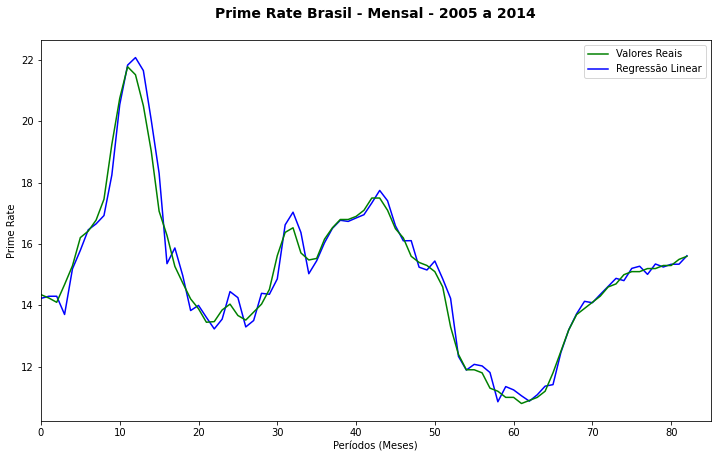

In [151]:
#Cria um gráfico dos valores reais, previsões da regressão linear e do modelo utilizando o último valor
plt.figure(figsize=(12,7))
plt.title('Prime Rate Brasil - Mensal - 2005 a 2014\n', 
         {'fontsize': 14,'fontweight': 'bold'})
plt.ylabel('Prime Rate')
plt.xlabel(u'Períodos (Meses)')

reg_val, = plt.plot(y_pred, color='b', label=u'Regressão Linear')
true_val, = plt.plot(y_true, color='g', label='Valores Reais')

plt.xlim([0,85])
plt.legend(handles=[true_val, reg_val])
plt.show();